# Wykład Specjalizujący DSiP
# Zadanie 5
## Mateusz Baran
### 155620

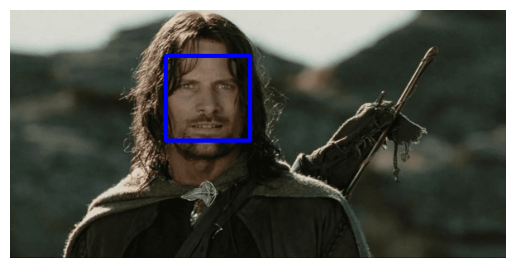

Znaleziono 1 twarzy!


In [4]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

frame = cv2.imread("aragorn.png")
frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in face_rects:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis labels
plt.show()

print(f"Znaleziono {len(face_rects)} twarzy!")

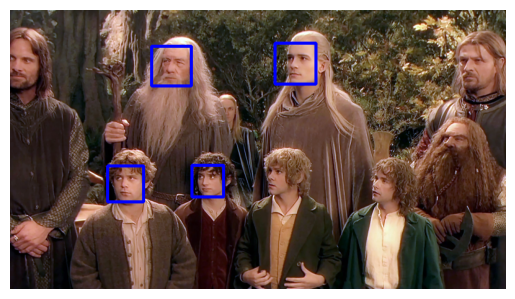

Znaleziono 4 twarzy!


In [5]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

frame = cv2.imread("lotr.png")
frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in face_rects:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis labels
plt.show()

print(f"Znaleziono {len(face_rects)} twarzy!")

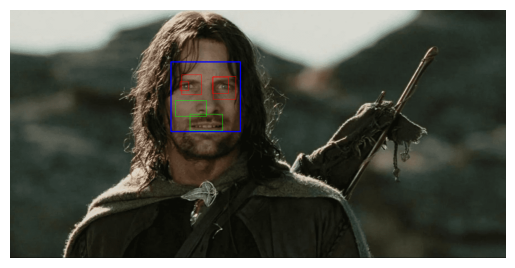

In [6]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

image = cv2.imread("aragorn.png")

gray_filter = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_filter, 7, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

roi_gray = gray_filter[y:y + h, x:x + w]
roi_color = image[y:y + h, x:x + w]

smiles = smile_cascade.detectMultiScale(roi_gray, 1.3, 5)


for (sx, sy, sw, sh) in smiles:
    cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 1)

eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)

for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


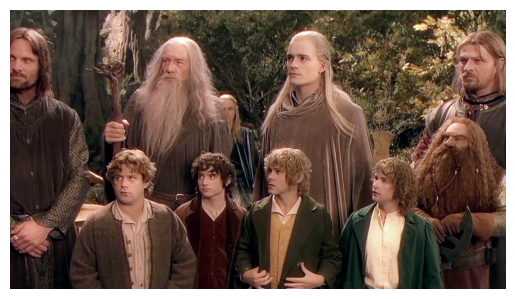

Found 0 people!


In [7]:
import cv2

scaling_factor = 2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

image = cv2.imread("lotr.png")

image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

people_rects = hog.detectMultiScale(image, winStride=(8, 8), padding=(30, 30), scale=1.06)

for (x, y, w, h) in people_rects[0]:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis labels
plt.show()

print(f"Found {len(people_rects[0])} people!")


In [ ]:
import cv2
import numpy as np

# Utwórz obiekt klasyfikatora HOG
hog = cv2.HOGDescriptor()

# Ustaw klasyfikator HOG domyślnego detektora osób
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Otwórz wideo
cap = cv2.VideoCapture('ludzie.mp4')

# Uruchom wątek wyświetlania obrazu
cv2.startWindowThread()

# Główna pętla programu
while True:
    # Przeczytaj kolejny obrazek z wideo
    ret, frame = cap.read()

    # Jeśli nie udało się odczytać klatki, przerwij pętlę
    if not ret:
        break

    # Zmniejsz rozmiar obrazu
    frame = cv2.resize(frame, (800, 560))

    # Konwertuj obraz na skalę szarości
    gray_filter = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Wykonaj wykrywanie osób
    boxes, weights = hog.detectMultiScale(gray_filter, winStride=(8, 8))

    # Przetwórz wyniki wykrywania
    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    # Narysuj ramki wokół wykrytych osób
    for (xa, ya, xb, yb) in boxes:
        cv2.rectangle(frame, (xa, ya), (xb, yb), (0, 255, 0), 1)

    # Wyświetl obraz
    cv2.imshow('frame',frame)

    # Sprawdź, czy użytkownik nacisnął klawisz `q`
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Zamknij wideo
cap.release()

# Zamknij wszystkie okna
cv2.destroyAllWindows()
